In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
from astropy.time import Time
import warnings

from matplotlib.ticker import MultipleLocator

In [3]:
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Ariel']
mpl.rcParams['font.size'] = '25'
mpl.rcParams['xtick.labelsize'] = '25'
mpl.rcParams['ytick.labelsize'] = '25'

In [4]:
import sys
sys.path.append('../tools/')
from dust_extinction import calALambda
from data_binning import data_binning

color_map = {
    'cyan': '#66c2a5',
    'orange': '#ff7f00',
    'blue': '#8da0cb',
    'purple': '#7570b3',
    'pink': '#fccde5',
    'green': '#33a02c',
    'yellow': '#ffd92f',
    'brown': '#e5c494',
    'magenta': '#f1598a',
    'grey': '0.3',
    'darkgrey': '0.2'
}

In [22]:
host = np.loadtxt('SN2020jgb/host_20220331_Keck2.ascii')
host = host[host[:, 0] < 8700]
host = host[host[:, 0] > 4500]

In [23]:
from scipy.interpolate import splrep, splev
out = data_binning(host, size=2)
spl = splrep(out[:, 0], out[:, 1])
wv = np.linspace(out[0, 0], out[-1, 0], 1000)
fl = splev(wv, spl)

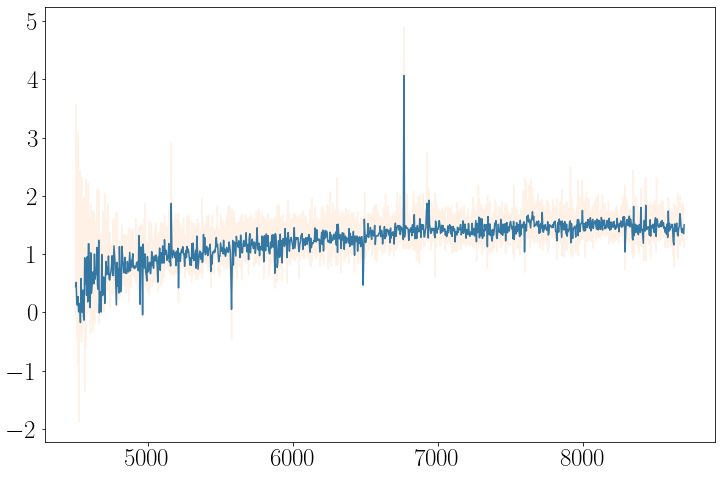

In [24]:
plt.figure(figsize=(12, 8))
plt.plot(wv, fl)
plt.plot(host[:, 0], host[:, 1], alpha=0.1)

0.81801001095841


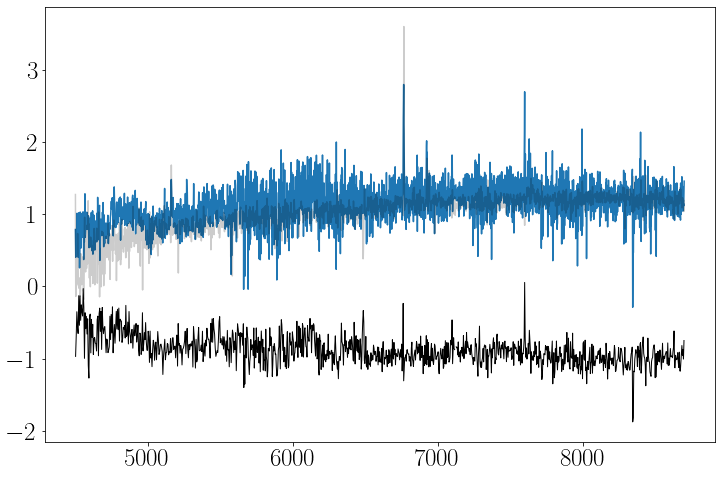

In [25]:
nebular3 = np.loadtxt('SN2020jgb/ZTF20aayhacx_20201020_Keck1_v1.ascii')
nebular3 = nebular3[nebular3[:, 0] < 8700]
nebular3 = nebular3[nebular3[:, 0] > 4500]
wv3 = nebular3[:, 0]
flux3 = nebular3[:, 1] / 1e-17

host = splev(wv3, spl)
norm = np.median(flux3[(wv3 > 8000) & (wv3 < 8500)]) / np.median(
    host[(wv3 > 8000) & (wv3 < 8500)])

flux_sub3 = flux3 - splev(wv3, spl) * norm
plt.figure(figsize=(12, 8))
plt.plot(wv3, flux3)
#plt.plot(wv3, flux_sub3, alpha=0.2, color='k')
plt.plot(wv3, splev(wv3, spl) * norm, alpha=0.2, color='k')

inp = np.array([wv3, flux_sub3, nebular3[:, 3] / 1e-17]).T
np.savetxt('SN2020jgb/ZTF20aayhacx_20201020_Keck1_sub.ascii',
           inp,
           fmt='%.4f',
           header='MJD     =        59143.2581490')
bins = data_binning(inp, size=3)
plt.plot(bins[:, 0], bins[:, 1] - 1, color='k', linewidth=1)

print(norm)

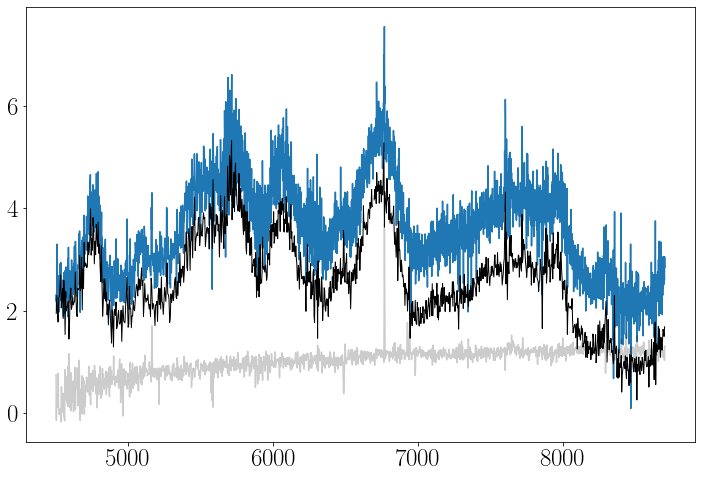

In [26]:
nebular1 = np.loadtxt('SN2020jgb/ZTF20aayhacx_20200623_Keck1_v1.ascii')
nebular1 = nebular1[nebular1[:, 0] < 8700]
nebular1 = nebular1[nebular1[:, 0] > 4500]
wv1 = nebular1[:, 0]
flux1 = nebular1[:, 1] / 1e-17
flux_sub1 = flux1 - splev(wv1, spl) * norm
plt.figure(figsize=(12, 8))
plt.plot(wv1, flux1)
#plt.plot(wv1, flux_sub1, alpha=0.2, color='k')
plt.plot(wv1, splev(wv1, spl) * norm, alpha=0.2, color='k')

inp = np.array([wv1, flux_sub1, nebular1[:, 3] / 1e-17]).T
'''np.savetxt(
    'SN2020jgb/ZTF20aayhacx_20200623_Keck1_sub.ascii',
    inp,
    fmt='%.4f',
    header='MJD     =        59023.5838600')'''
bins = data_binning(inp, size=3)
plt.plot(bins[:, 0], bins[:, 1], color='k', linewidth=1)

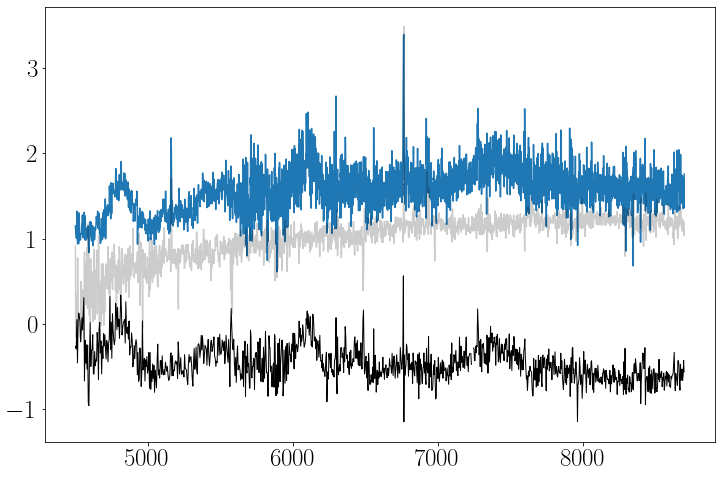

In [27]:
nebular2 = np.loadtxt('SN2020jgb/ZTF20aayhacx_20200915_Keck1_v2.ascii')
nebular2 = nebular2[nebular2[:, 0] < 8700]
nebular2 = nebular2[nebular2[:, 0] > 4500]
wv2 = nebular2[:, 0]
flux2 = nebular2[:, 1] / 1e-17
flux_sub2 = flux2 - splev(wv2, spl) * norm
plt.figure(figsize=(12, 8))
plt.plot(wv2, flux2)
#plt.plot(wv2, flux_sub2, alpha=0.2, color='k')
plt.plot(wv2, splev(wv2, spl) * norm, alpha=0.2, color='k')

inp = np.array([wv2, flux_sub2, nebular2[:, 3] / 1e-17]).T
np.savetxt(
    'SN2020jgb/ZTF20aayhacx_20200915_Keck1_sub.ascii',
    inp,
    fmt='%.4f',
    header='MJD     =        59107.2881200')
bins = data_binning(inp, size=3)
plt.plot(bins[:, 0], bins[:, 1] - 1, color='k', linewidth=1)